# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 1.1: (Pseudo-)Random Number Generator</span>

The task of this exercise was to test the genuinity of the random number generator (generating numbers between 0 and 1) provided in class by: 
- evaluation of its mean value
- evaluation of its variance
- $\chi^2$ test

$\textbf{Mean Value}$

The theoretical mean value of a uniform distribution between 0 and 1 is provided by:
$$\langle r \rangle = \int_0^1 r dr = \frac{1}{2}$$
The graph below represents the random number generator mean value with its uncertainty as a function of the number of blocks; for this calculation, I've used $10^6$ throws gathered in $100$ blocks (thus every block contains $10^4$ throws).

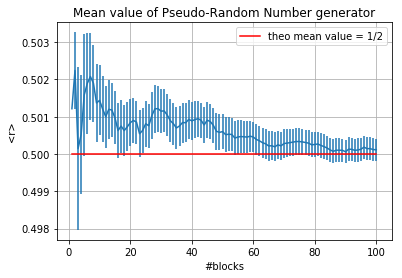

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Esercizio01.1/mean.txt", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x,f,yerr=error)
y = np.full(100, 0.5)
plt.plot(x,y,  'r', label='theo mean value = 1/2')
plt.xlabel('#blocks')
plt.ylabel('<r>')
plt.title('Mean value of Pseudo-Random Number generator')
plt.grid(True)
plt.legend()

plt.show()

The graph shows perfect agreement between the computed and the theoretical values.

$\textbf{Variance}$

The theoretical variance of a uniform distribution between 0 and 1 is provided by:
$$\sigma^2 = \int_0^1 \biggl(r-\frac{1}{2} \biggr)^2 dr = \frac{1}{12}$$
The graph below represents the random number generator variance with its uncertainty as a function of the number of blocks; again, I've used $10^6$ throws gathered in $100$ blocks.

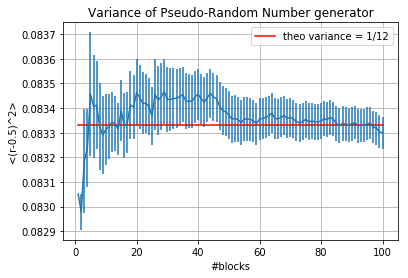

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Esercizio01.1/variance.txt", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x,f,yerr=error)
y = np.full(100, 1/12)
plt.plot(x,y,  'r', label='theo variance = 1/12')
plt.xlabel('#blocks')
plt.ylabel('<(r-0.5)^2>')
plt.title('Variance of Pseudo-Random Number generator')
plt.grid(True)
plt.legend()

plt.show()

The graph shows perfect agreement between the computed and the theoretical values.

$\textbf{$\chi^2$ test}$

The $\chi^2$ reveals the goodness of measurements $O_i$ of an observable with respect to their expected values $E_i$; it is defined by:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
We can use this statistical object to verify how much realistic is our asumption that the numbers generated by the random number generator are thrown uniformly between 0 and 1. In this case, we divide the interval $[0,1]$ into M identical sub-intervals and we extract n random numbers between 0 and 1, then let $n_i$ be the number of extractions in the $i^{th}$ sub-interval; thus we have that:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
because if the numbers are thrown from a uniform distribution then the expected number of extractions in each sub-interval is n/M (number of throws divided by the number of sub-intervals). We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq M$.

I've chosen the values $M=100$ and $n=10^4$, and I've repeated the test 100 times; the graph below shows the results of these 100 $\chi^2$ tests.

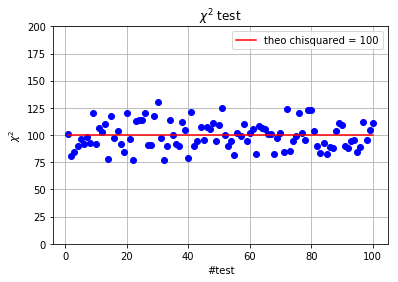

In [64]:
import matplotlib
import matplotlib.pylab as plt
import numpy as np

x, f = np.loadtxt("Esercizio01.1/chi.txt", usecols=(0,1), delimiter='	', unpack='true')

plt.plot(x,f, 'bo')
y = np.full(100, 100)
plt.plot(x,y,  'r', label='theo chisquared = 100')
plt.xlabel('#test')
plt.ylabel('$\chi^2$')
plt.title('$\chi^2$ test')
plt.ylim(0, 200)
plt.grid(True)
plt.legend()


plt.show()

The graph shows values of $\chi^2$ between 75 and 125, in agreement with the expected value of 100.

## <span style="color:red">  Numerical exercises 1.2: Central Limit Theorem</span>

In this exercise I've extended the Pseudo-Random Number Generator adding methods to extract numbers from a generic exponential distribution $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ and from a generic Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.

Then I've checked the (extended) Central Limit Theorem by computing histograms filled with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled from a uniform distribution between 0 and 1, an exponential distribution (using $\lambda=1$) and a Cauchy-Lorentz distribution (using $\mu=0$, $\Gamma=1$).

The Central Limit Theorem states the following: given N statistically independent and identically distributed random variables $x_1$, $x_2$, ..., $x_N$ with $\langle x_1 \rangle =...= \langle x_N \rangle = \mu$ and $\sigma^2_{x_1} =...= \sigma^2_{x_N} = \sigma^2 < \infty$ let $S_N$ be the average probability distribution, i.e. $S_N = \frac{1}{N}\sum_{i=1}^N x_i$, then we have that:

1) $\langle S_N \rangle = \mu$

2) $\sigma^2_{S_N} = \frac{\sigma^2}{N}$

3) $\lim_{N \to \infty} P_N(S_N) = \frac{1}{\sqrt{2\pi \sigma^2_{S_N}}}\exp{\bigg(-\frac {(S_N - \mu)^2}{2\sigma^2_{S_N}}\bigg)}$

This result states that whatever the underlying distribution is, as long as the variance is finite, the average variable is asintotically Gaussian distributed. Now, the uniform and exponential distribution satisfy the hypotesis of the Central Limit Theorem, thus we will see in the histograms representing the average variable a Gaussian distribution, altough the starting distribution is far from being Gaussian; this result is shown in the two following figures. 

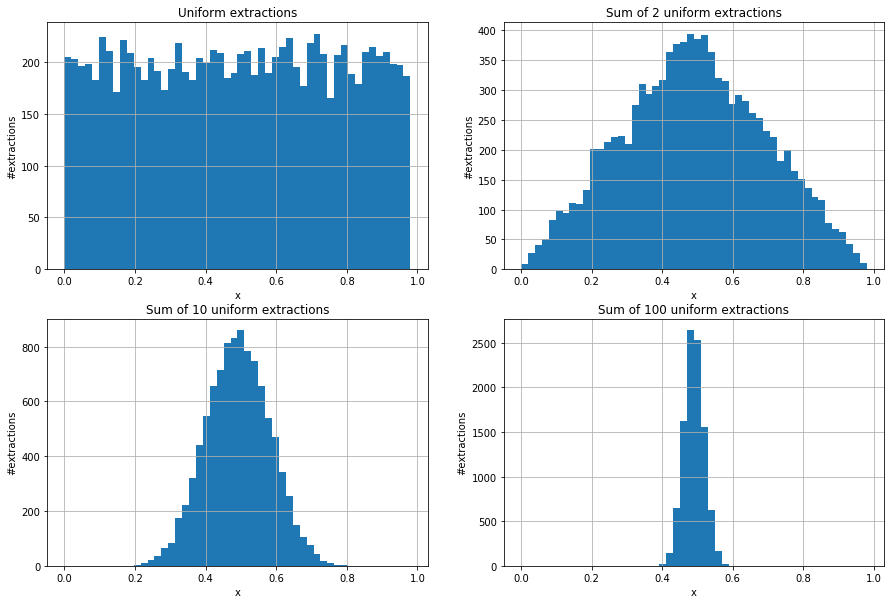

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, counts = np.loadtxt("Esercizio01.2/standard1.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Uniform extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/standard2.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,2)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 2 uniform extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/standard10.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,3)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 10 uniform extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/standard100.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,4)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 100 uniform extractions')
plt.grid(True)

plt.show()

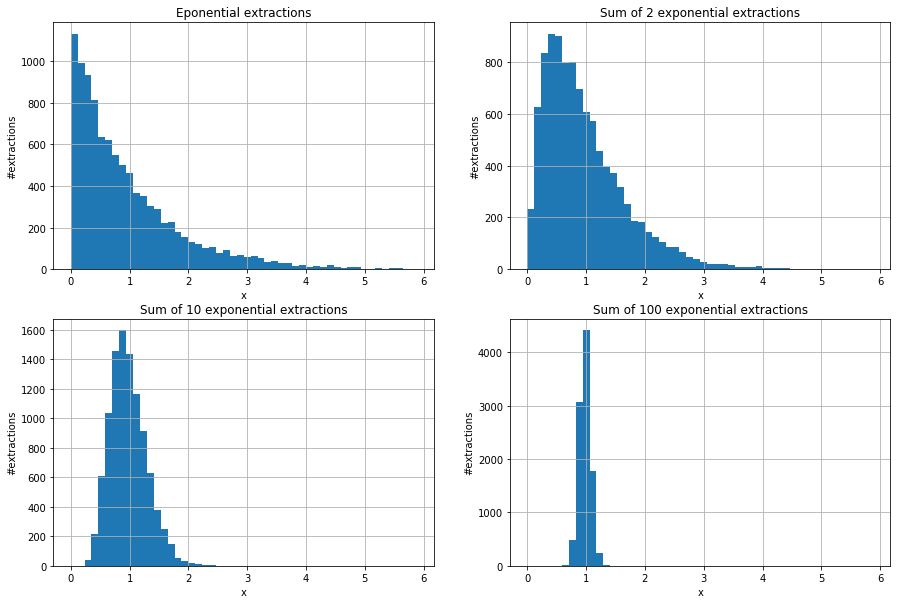

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, counts = np.loadtxt("Esercizio01.2/exponential1.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Eponential extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/exponential2.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,2)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 2 exponential extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/exponential10.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,3)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 10 exponential extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/exponential100.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,4)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 100 exponential extractions')
plt.grid(True)

plt.show()

Unfortunately, the Cauchy-Lorentz distribution has $\sigma^2 = \infty$, so it doesn't fulfill the Central Limit Theorem hypotesis. An extended version of the CLT tells us that the average variable of a Cauchy-Lorentz set of variables is asintotically distributed as a Cauchy-Lorentz. This result is shown in the graph below.

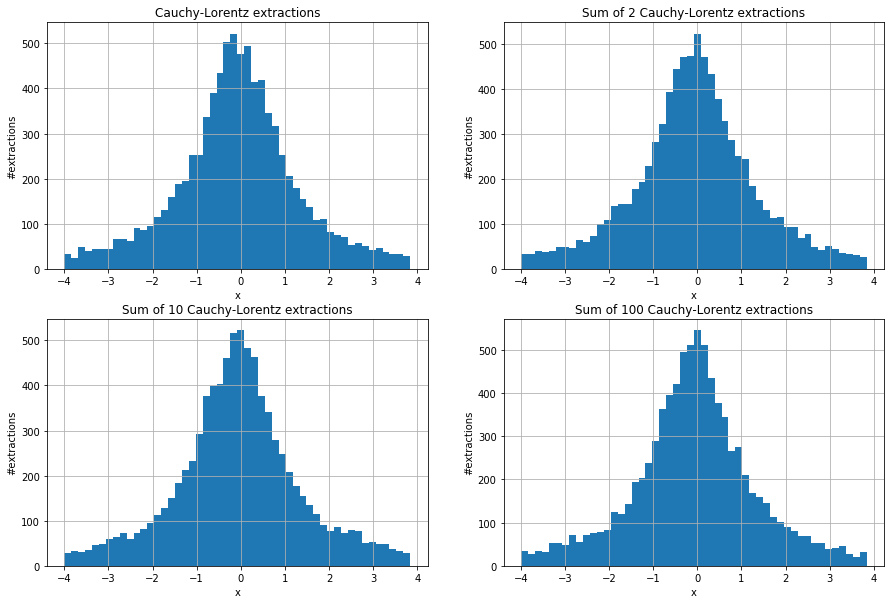

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, counts = np.loadtxt("Esercizio01.2/cauchy_lorentz1.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Cauchy-Lorentz extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/cauchy_lorentz2.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,2)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 2 Cauchy-Lorentz extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/cauchy_lorentz10.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,3)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 10 Cauchy-Lorentz extractions')
plt.grid(True)

x, counts = np.loadtxt("Esercizio01.2/cauchy_lorentz100.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.subplot(2,2,4)
plt.hist(x, bins=50, weights=counts)
plt.xlabel('x')
plt.ylabel('#extractions')
plt.title('Sum of 100 Cauchy-Lorentz extractions')
plt.grid(True)

plt.show()

## <span style="color:red">  Numerical exercises 1.3: Buffon's experiment</span>

This exercise is the simulation of Georges-Louis Leclerc, count of Buffon, experiment, i.e. the measure of $\pi$ obtained by throwing randomly $N_{thr}$ needles of lenght L on a set of parallel lines at distance d, counting how many times the needles intersect the lines ($N_{hit}$); then the value of $\pi$ is given by:

$$\pi = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

I've realized the simulation of this experiment considering two parallel lines at a distance $d$, then sampling:
- x $\in [0,d]$ uniformly
- $\theta \in [0,2\pi]$ uniformly (not using explicitly $\pi$ because the task of the simulation is to compute $\pi$, but using $\theta = 2arcos\big(\displaystyle\frac{x}{\sqrt{x^2+y^2}}\big)\;$ where $x \in [-1,1]$ uniformly and $y \in [0,1]$ uniformly, with the constraint $x^2+y^2 \leq 1$)

$N_{thr}$ is then increased if $L\,cos(\theta) \geq d-x$ 

The graph below shows the progressive value of $\pi$ as a function of the number of blocks.

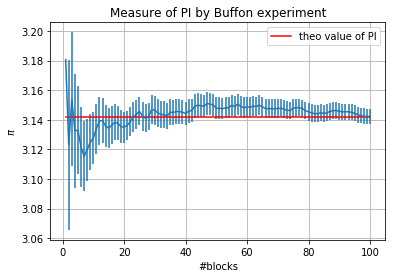

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Esercizio01.3/PI.txt", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x,f,yerr=error)
y = np.full(100, np.pi)
plt.plot(x,y,  'r', label='theo value of PI')
plt.xlabel('#blocks')
plt.ylabel('$\pi$')
plt.title('Measure of PI by Buffon experiment')
plt.grid(True)
plt.legend()

plt.show()